In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [25]:
x = 1.84 # cm; block thickness
dx = 0.05 # cm; error in x

a = np.radians(90 - np.array([30, 20, 40, 50, 60, 70, 80, 90])) # rad; angle of incidence
da = np.radians(1) # rad; error in a1

y = np.array([1.0, 1.3, 1.15, 0.8, 0.6, 0.5, 0.2, 0]) # cm; exit distance
dy = 1.5*(np.sqrt(x*x + y*y) - x) + 0.05 # cm; error in y

sina = np.sin(a) # sine of incidence
dsina = np.abs(da * np.cos(a) )
sinb = y / np.sqrt(y*y + x*x) # sine of refraction
dsinb = (x/(x*x + y*y)**1.5)* np.sqrt( (dx*y)**2 + (dy*x*x)**2 / (x*x + y*y)**1.5 )

In [23]:
model = (
    lambda sin, n: 
    sin / n
)
[n], cov = sp.optimize.curve_fit(
    model, 
    sina, 
    sinb
)
dn = np.sqrt(cov[0,0])
res = sinb - model(sina, n)
chi2 = np.sum((res/dsinb)**2)
rchi2 = chi2 / ( len(sina) - 1)
n, dn, chi2, rchi2

(1.6104711196558306,
 0.05374499525047329,
 1.5911876415908355,
 0.2273125202272622)

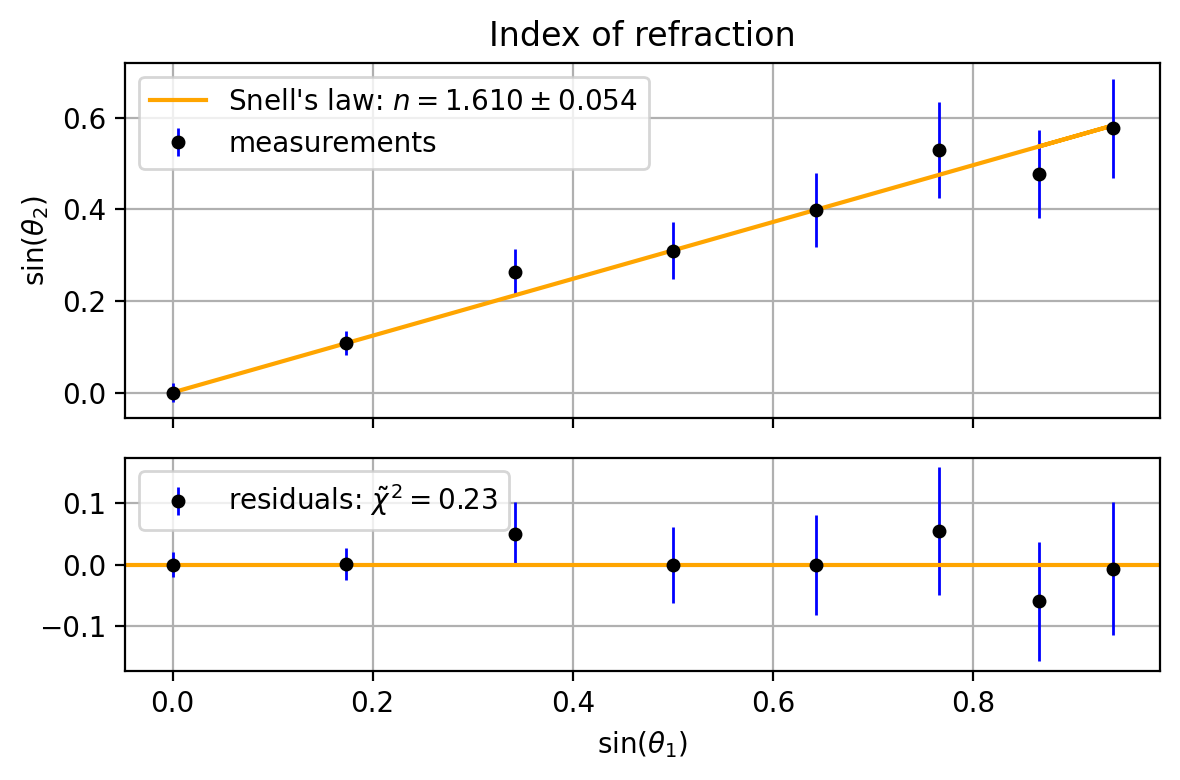

In [24]:
fig, (ax_main, ax_res) = plt.subplots(
        2, 1, sharex=True, 
    figsize=(6, 4), dpi=200, 
    gridspec_kw={'height_ratios': [5, 3]}
)

plt.sca(ax_main)
plt.title("Index of refraction")

plt.errorbar(
    sina, sinb, yerr = dsinb,
    ecolor="blue", c="black",
    label='measurements',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)

plt.plot(sina, model(sina, n),
            label=f"Snell's law: $n = {n:.3f}\pm{dn:.3f}$", color='orange'
)


plt.ylabel("$\sin(\\theta_2)$")
plt.grid()
plt.legend(loc='upper left')

plt.sca(ax_res)
plt.errorbar(
    sina, res, yerr = dsinb,
    ecolor="blue", c="black",
    label=f'residuals: $\\tilde\chi^2 = {rchi2:.2f}$',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)
plt.axhline(0, color='orange')

plt.xlabel("$\sin(\\theta_1)$")
plt.grid()
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('exp4_0.png')